# Insurance Amount Prediction and compairing different models 

---------------------

## Problem Definition

- Today we will explore a data set dedicated to the cost of treatment of different patients. The cost of treatment depends on many factors: diagnosis, type of clinic, city of residence, age and so on. We have no data on the diagnosis of patients. But we have other information that can help us to make a conclusion about the health of patients and practice regression analysis.

# Objective
 - Understand the dataset and features.
 - Analyse the dataset.
 - Exploring the given insight.
 - performing exploratory data analysis
 - fitting appropriate models and compairing their accuarcy
 - predicting for future unseen data
 - prediction using user input for user interaction 

# Approach
 - Importing all libraries which we needed.
 - Perform data preprocessing technique to get balanced structured data.
 - Perform statistical data analysis and derive valuable inference.
 - perform exploratory data analysis and derive valuable inference.
 - Visualizing things with some plot and derive valuable inference.
 - Train and test through LinearRegression models for better prediction.
 - compairing model accuracies
 - predicting using the best model
 - creating a user interface for user interaction

# About the Dataset

This dataset contains :

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

# Importing necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import seaborn as sns

## Loading the Dataset

In [3]:
data=pd.read_csv("C:\\Users\\A\\Desktop\\insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
print(f'Description of the given dataset: ')
print("")
print({data.info()})

Description of the given dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
{None}


In [5]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [6]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
data.shape

(1338, 7)

# Exploratory Data Analysis

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

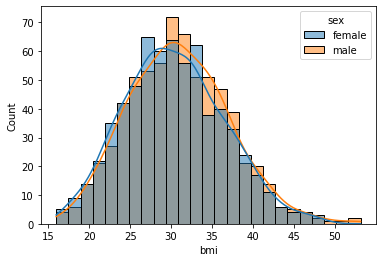

In [9]:
sns.histplot(x='bmi', data=data, kde=True, hue='sex') 
plt.show()

C:\Users\A\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

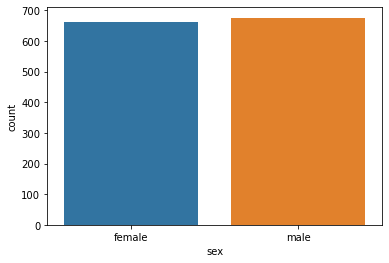

In [10]:
sns.countplot(data['sex'])

C:\Users\A\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='smoker', ylabel='count'>

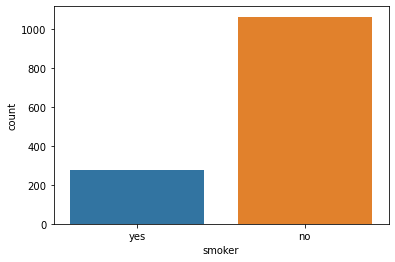

In [11]:
sns.countplot(data['smoker'])

C:\Users\A\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='region', ylabel='count'>

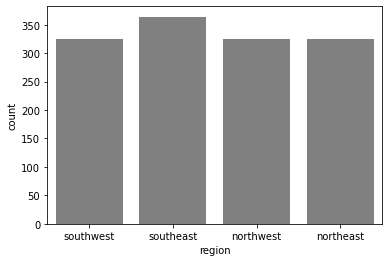

In [12]:
sns.countplot(data['region'], color = 'Grey')

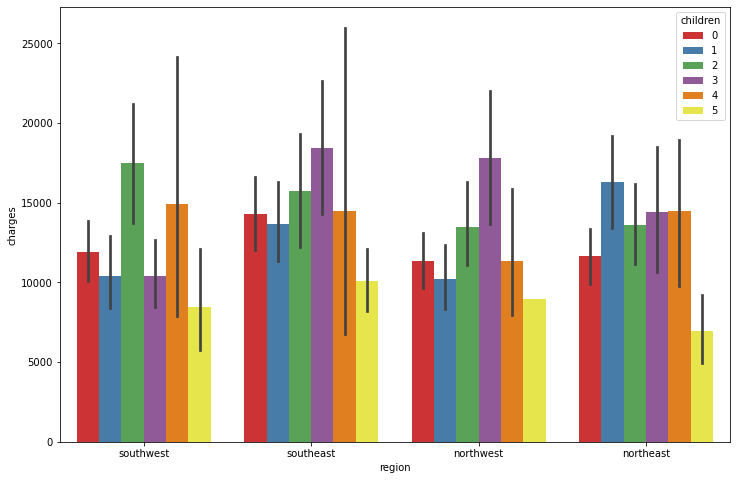

In [13]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='children', data=data, palette='Set1')

As we can see from these barplots the highest charges due to smoking are still in the Southeast but the lowest are in the Northeast. People in the Southwest generally smoke more than people in the Northeast, but people in the Northeast have higher charges by gender than in the Southwest and Northwest overall. And people with children tend to have higher medical costs overall as well

Now let's analyze the medical charges by age, bmi and children according to the smoking factor



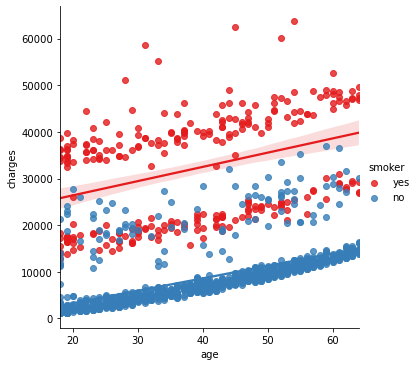

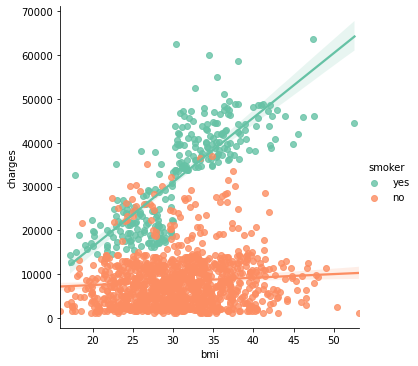

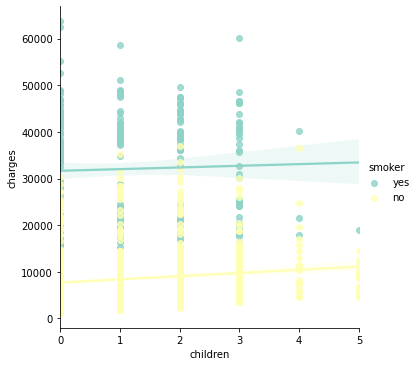

In [14]:
ax = sns.lmplot(x = 'age', y = 'charges', data=data, hue='smoker', palette='Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=data, hue='smoker', palette='Set2')
ax = sns.lmplot(x = 'children', y = 'charges', data=data, hue='smoker', palette='Set3')

Smoking has the highest impact on medical costs, even though the costs are growing with age, bmi and children. Also people who have children generally smoke less, which the following violinplots shows too



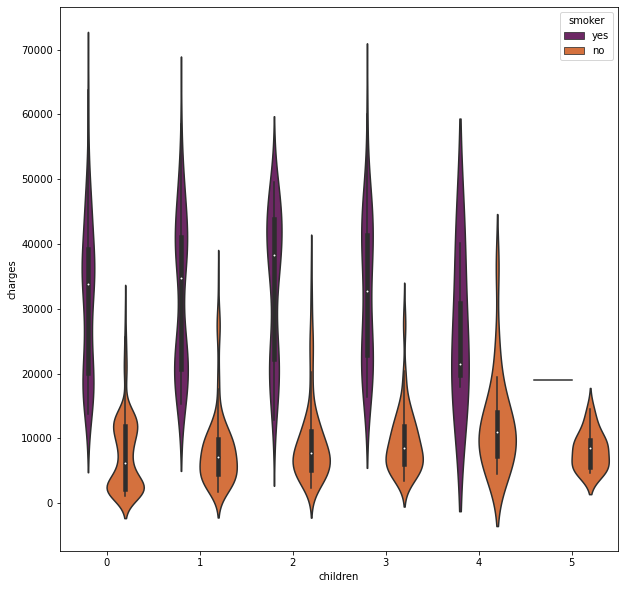

In [15]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.violinplot(x = 'children', y = 'charges', data=data,
                 orient='v', hue='smoker', palette='inferno')


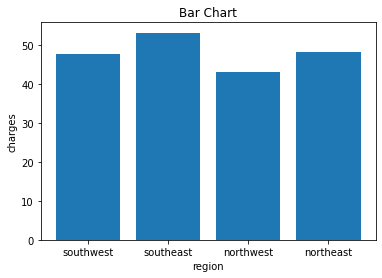

In [16]:
plt.bar(data['region'], data['bmi'])
plt.title("Bar Chart")
plt.xlabel('region')
plt.ylabel('charges')
plt.show()

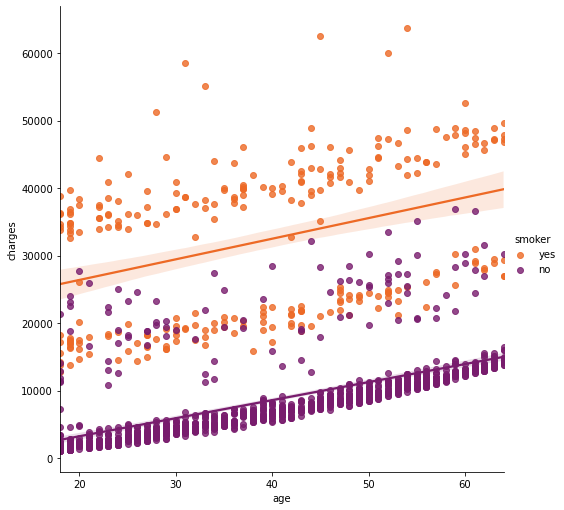

In [17]:
sns.lmplot(x="age", y="charges", hue="smoker", data=data, palette = 'inferno_r', height = 7)

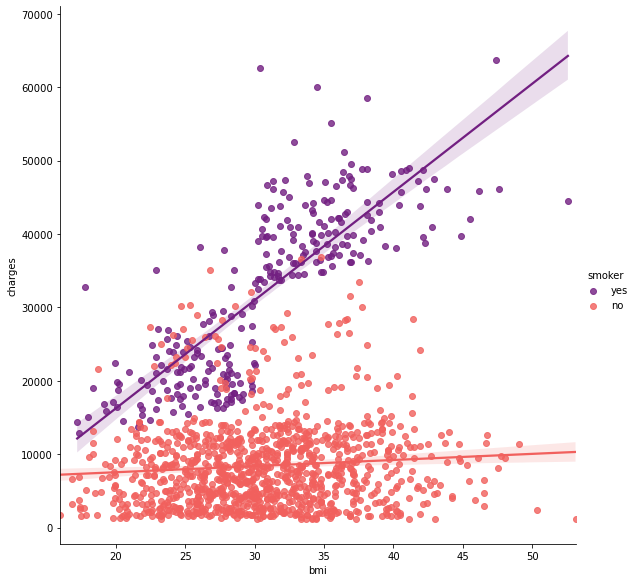

In [18]:
sns.lmplot(x="bmi", y="charges", hue="smoker", data=data, palette = 'magma', height = 8)

## Encoding the categorical independent variables

In [19]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['sex']= label_encoder.fit_transform(data['sex'])
data['smoker']= label_encoder.fit_transform(data['smoker'])
data['region']=label_encoder.fit_transform(data['region'])
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [20]:
data.corr().style.background_gradient(cmap = 'Greys')

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


<AxesSubplot:>

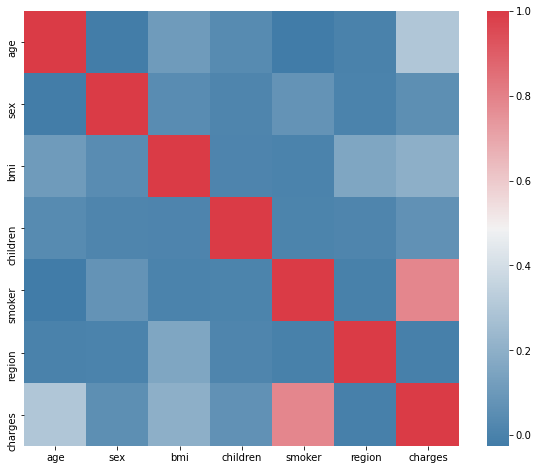

In [21]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

## separating the dependent variable and independent variables

In [22]:
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

## Checking for Null Values

In [23]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## splitting the data into train test

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

## Scaling the independent variables

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[:,:] = sc.fit_transform(x_train[:,:])
x_test[:,:] = sc.transform(x_test[:,:])

# Model Building

In [26]:
def model_performance(model,model_name,x_train = x_train,y_train = y_train,x_test = x_test,y_test = y_test):
    
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    Training_Score = np.round(model.score(x_train,y_train),3)
    Testing_Score = np.round(model.score(x_test,y_test),3)
    
    mse_training = np.round(mean_squared_error(y_train,y_train_pred),3)
    mse_testing = np.round(mean_squared_error(y_test,y_test_pred),3)
    
    mae_training = np.round(mean_absolute_error(y_train,y_train_pred),3)
    mae_testing = np.round(mean_absolute_error(y_test,y_test_pred),3)
    
    r2_training = np.round(r2_score(y_train,y_train_pred),3)
    r2_testing = np.round(r2_score(y_test,y_test_pred),3)
    
    
    print("Model Performance for:",model_name)
    print("")
    
    print("Training Score:",Training_Score)
    print("Testing Score:",Testing_Score)
    print("")
    
    print("Training Data Mean Squared Error:",mse_training)
    print("Testing Data Mean Squared Error:",mse_testing)
    print("")
    
    print("Training Data Mean Absolute Error:",mae_training)
    print("Testing Data Mean Absolute Error:",mae_testing)
    print("")
    
    print("Training Data r2_score:",r2_training)
    print("Testing Data r2_score:",r2_testing)
    print("")
    
    
    plt.figure(figsize=(10,6))
    plt.scatter(y_train,y_train - y_train_pred,
          c = 'black', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
    plt.scatter(y_test,y_test - y_test_pred,
          c = 'c', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
    plt.xlabel('Predicted values')
    plt.ylabel('Tailings')
    plt.legend(loc = 'upper left')
    plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')
    plt.show()
    
    
    return Training_Score,Testing_Score,mse_training,mse_testing,mae_training,mae_testing,r2_training,r2_testing

## Multiple Linear Regression

In [27]:
model1 = LinearRegression()
model1.fit(x_train,y_train)

LinearRegression()

Model Performance for: LinearRegression()

Training Score: 0.748
Testing Score: 0.762

Training Data Mean Squared Error: 36817874.969
Testing Data Mean Squared Error: 35480663.812

Training Data Mean Absolute Error: 4170.334
Testing Data Mean Absolute Error: 4056.118

Training Data r2_score: 0.748
Testing Data r2_score: 0.762



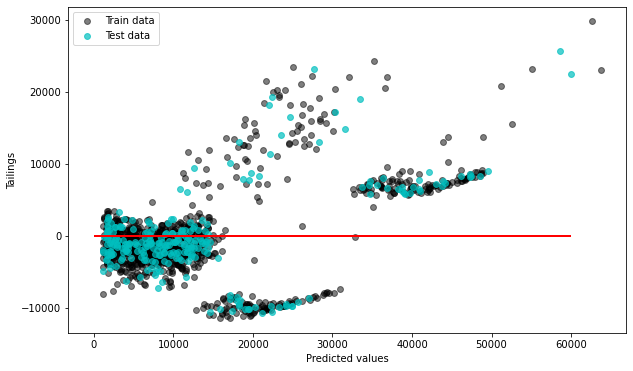

In [28]:
Linear_regression_performance = model_performance(model1,model_name = model1)

## Ridge Regression

In [29]:
param_grid = {'alpha':np.random.rand(100)}
grid = GridSearchCV(Ridge(),param_grid = param_grid,cv=4)
grid.fit(x,y)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid={'alpha': array([8.90242346e-01, 6.10133306e-01, 9.96901867e-01, 8.21697134e-01,
       3.86816001e-02, 4.20419165e-01, 8.97123639e-01, 5.60096267e-01,
       5.96466890e-01, 1.69958794e-02, 5.51927308e-01, 1.14004483e-01,
       7.63995078e-01, 5.42549204e-01, 1.67299452e-01, 8.80630615e-01,
       8.70589448e-01, 8.12857272e-01, 4.81970884e-02, 6....
       7.52840635e-01, 7.91636829e-01, 8.26674742e-01, 2.74239204e-02,
       4.65371176e-01, 7.12254351e-01, 7.03365980e-01, 1.22977667e-01,
       2.14441231e-01, 6.13631431e-01, 4.98244969e-01, 3.46791266e-01,
       5.85192811e-01, 5.45010063e-01, 2.48464507e-01, 2.89723060e-01,
       4.81135771e-01, 3.07264477e-01, 9.85458783e-01, 5.20513268e-01,
       3.17846113e-01, 8.34173672e-01, 4.13558248e-01, 8.46292478e-01])})

In [30]:
model2 = grid.best_estimator_
model2.fit(x_train,y_train)

Ridge(alpha=0.0007003415453100681)

Model Performance for: Ridge(alpha=0.0007003415453100681)

Training Score: 0.748
Testing Score: 0.762

Training Data Mean Squared Error: 36817874.969
Testing Data Mean Squared Error: 35480666.782

Training Data Mean Absolute Error: 4170.335
Testing Data Mean Absolute Error: 4056.119

Training Data r2_score: 0.748
Testing Data r2_score: 0.762



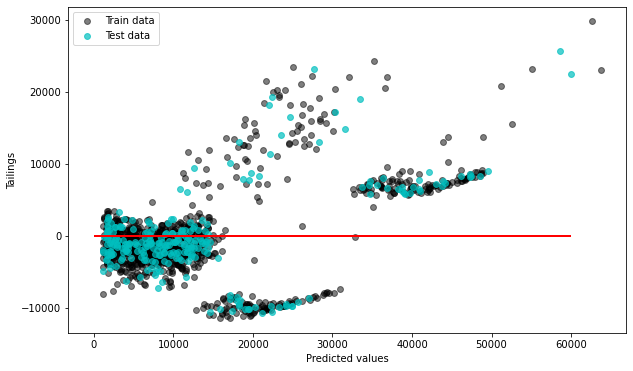

In [31]:
Ridge_performance = model_performance(model2,model_name = model2)

## Lasso Regression

In [32]:
param_grid = {'alpha':np.random.rand(100)}
grid = GridSearchCV(Lasso(),param_grid = param_grid,cv=4)
grid.fit(x,y)

GridSearchCV(cv=4, estimator=Lasso(),
             param_grid={'alpha': array([0.57187868, 0.1075241 , 0.22017576, 0.97489653, 0.636958  ,
       0.12002431, 0.87133641, 0.5665175 , 0.27039507, 0.65096937,
       0.25936572, 0.65071948, 0.32315766, 0.74359152, 0.41023087,
       0.83993387, 0.81190246, 0.76866324, 0.31307195, 0.49725594,
       0.34289025, 0.70519865, 0.36734116, 0.19801461, 0.44457167,
       0.53822848, 0.786...
       0.3441432 , 0.55639089, 0.73252622, 0.35977759, 0.16286206,
       0.68682117, 0.37708599, 0.48100949, 0.35473609, 0.96807469,
       0.71041353, 0.22556328, 0.36955563, 0.63422551, 0.95361973,
       0.18407882, 0.83253559, 0.91659991, 0.08692797, 0.93002749,
       0.31280697, 0.10454004, 0.35315438, 0.60194745, 0.1621647 ,
       0.67354756, 0.90137178, 0.53401404, 0.14942238, 0.49721306,
       0.41612529, 0.43122452, 0.40249678, 0.49416534, 0.82347302])})

In [33]:
model3 = grid.best_estimator_
model3.fit(x_train,y_train)

Lasso(alpha=0.9748965348752436)

Model Performance for: Lasso(alpha=0.9748965348752436)

Training Score: 0.748
Testing Score: 0.762

Training Data Mean Squared Error: 36817881.253
Testing Data Mean Squared Error: 35482385.87

Training Data Mean Absolute Error: 4170.231
Testing Data Mean Absolute Error: 4056.068

Training Data r2_score: 0.748
Testing Data r2_score: 0.762



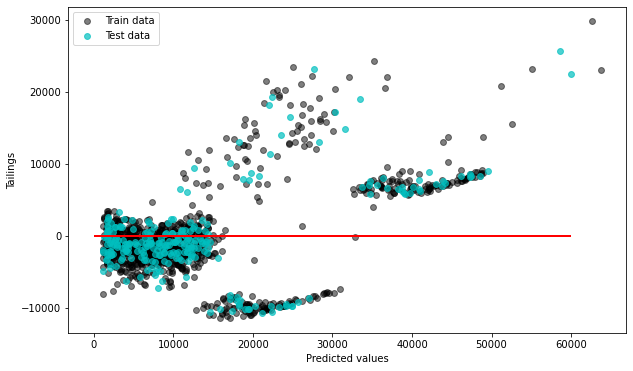

In [34]:
Lasso_performance = model_performance(model3,model_name = model3)

## Decision Tree 

In [35]:
param_grid = {'max_depth':np.arange(1,10),'min_samples_split':np.arange(2,10),'min_samples_leaf':np.arange(1,10)}
grid = GridSearchCV(DecisionTreeRegressor(),param_grid = param_grid,cv=4)
grid.fit(x,y)

GridSearchCV(cv=4, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [36]:
model4 = grid.best_estimator_
model4.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=8)

Model Performance for: DecisionTreeRegressor(max_depth=5, min_samples_leaf=8)

Training Score: 0.875
Testing Score: 0.879

Training Data Mean Squared Error: 18173874.925
Testing Data Mean Squared Error: 18121870.837

Training Data Mean Absolute Error: 2407.168
Testing Data Mean Absolute Error: 2413.44

Training Data r2_score: 0.875
Testing Data r2_score: 0.879



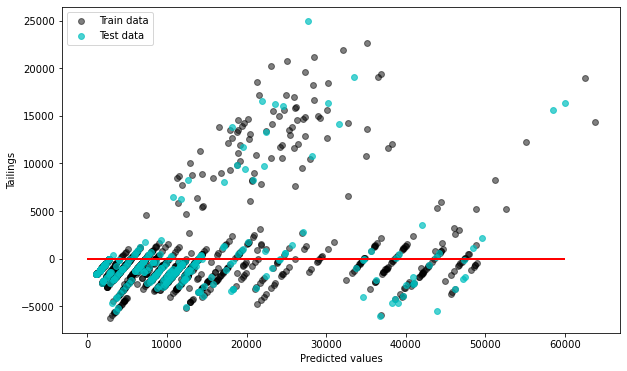

In [37]:
Decision_Tree_performance = model_performance(model4,model_name = model4)

## Random Forest

In [38]:
param_grid = {'max_depth':np.arange(1,10),'n_estimators':np.arange(150,250,10)}
grid = GridSearchCV(RandomForestRegressor(),param_grid)
grid.fit(x,y)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'n_estimators': array([150, 160, 170, 180, 190, 200, 210, 220, 230, 240])})

In [39]:
model5 = grid.best_estimator_
model5.fit(x_train,y_train)

RandomForestRegressor(max_depth=4, n_estimators=230)

Model Performance for: RandomForestRegressor(max_depth=4, n_estimators=230)

Training Score: 0.874
Testing Score: 0.875

Training Data Mean Squared Error: 18333129.007
Testing Data Mean Squared Error: 18648859.366

Training Data Mean Absolute Error: 2437.034
Testing Data Mean Absolute Error: 2403.491

Training Data r2_score: 0.874
Testing Data r2_score: 0.875



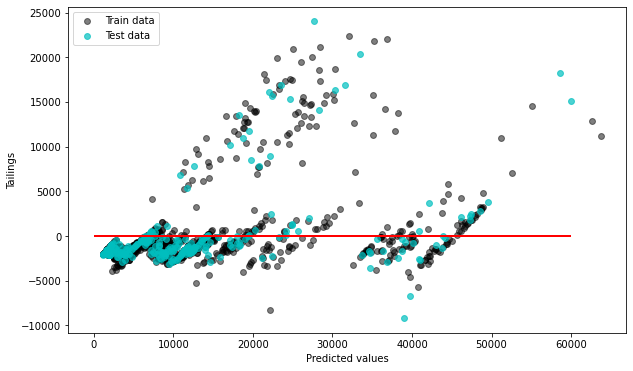

In [40]:
Random_Forest_performance = model_performance(model5,model_name = model5)

In [41]:
model_performance = [["Linear Regression",Linear_regression_performance[0],Linear_regression_performance[1],Linear_regression_performance[2],Linear_regression_performance[3],Linear_regression_performance[4],Linear_regression_performance[5],Linear_regression_performance[6],Linear_regression_performance[7]],
                     ["Ridge",Ridge_performance[0],Ridge_performance[1],Ridge_performance[2],Ridge_performance[3],Ridge_performance[4],Ridge_performance[5],Ridge_performance[6],Ridge_performance[7]],
                     [ "Lasso",Lasso_performance[0],Lasso_performance[1],Lasso_performance[2],Lasso_performance[3],Lasso_performance[4],Lasso_performance[5],Lasso_performance[6],Lasso_performance[7]],
                     ["Decision Tree",Decision_Tree_performance[0],Decision_Tree_performance[1],Decision_Tree_performance[2],Decision_Tree_performance[3],Decision_Tree_performance[4],Decision_Tree_performance[5],Decision_Tree_performance[6],Decision_Tree_performance[7]],
                     ["Random Forest",Random_Forest_performance[0],Random_Forest_performance[1],Random_Forest_performance[2],Random_Forest_performance[3],Random_Forest_performance[4],Random_Forest_performance[5],Random_Forest_performance[6],Random_Forest_performance[7]]]

In [42]:
performance = pd.DataFrame(model_performance,columns = ['Model_Name',"Train Score","Test Score","Train MSE",'Test MSE','Train MAE',"Test MAE","Train R2","Test R2"])

## comparison of different models

In [43]:
display(performance)

,Model_Name,Train Score,Test Score,Train MSE,Test MSE,Train MAE,Test MAE,Train R2,Test R2
0,Linear Regression,0.748,0.762,3.681787e+07,3.548066e+07,4170.334,4056.118,0.748,0.762
1,Ridge,0.748,0.762,3.681787e+07,3.548067e+07,4170.335,4056.119,0.748,0.762
2,Lasso,0.748,0.762,3.681788e+07,3.548239e+07,4170.231,4056.068,0.748,0.762
3,Decision Tree,0.875,0.879,1.817387e+07,1.812187e+07,2407.168,2413.440,0.875,0.879
4,Random Forest,0.874,0.875,1.833313e+07,1.864886e+07,2437.034,2403.491,0.874,0.875


<AxesSubplot:xlabel='Model_Name', ylabel='Test Score'>

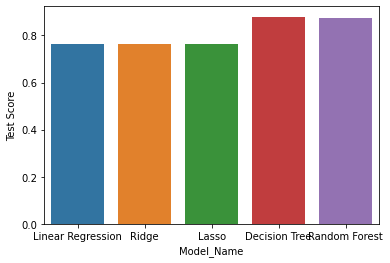

In [44]:
sns.barplot(x="Model_Name",y="Test Score",data=performance)

## Conclusion
- For our labelled  we have used diffrent supervised numerical value prediction techniques and we can clearly see that decision tree is giving the best test accuracy so we will use decision tree model for our future predictions.

# user interface

In [45]:
age= int(input("Enter Age : "))
sex=int(input("Gender(Enter 0 for female 1 for male) : "))
weight=float(input("Enter your weight(in kg) : "))
height=float(input("Enter your height(in meter) : "))
bmi=weight/height*2
n_children=int(input("No of Children : "))
smoker=int(input("Do you smoke? (put 0 for No,put 1 for yes) : "))
region=int(input("Region :(1:northwest,2:southeast,3:southwest) : "))
print("your predicted insurance charge is : ",model4.predict([[age,sex,bmi,n_children,smoker,region]]))

Enter Age : 45
Gender(Enter 0 for female 1 for male) : 1
Enter your weight(in kg) : 75
Enter your height(in meter) : 1.75
No of Children : 2
Do you smoke? (put 0 for No,put 1 for yes) : 1
Region :(1:northwest,2:southeast,3:southwest) : 2
your predicted insurance charge is :  [49392.07147889]
